# ch12 데이터프레임과 시리즈

## 데이터 그룹화 및 집계

In [30]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris_df = datasets.get_rdataset("iris", package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### group by

In [3]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped

In [4]:
iris_df.groupby(iris_df.Species)['Sepal.Length','Sepal.Width'].mean()

<ipython-input-4-9740b89836f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris_df.groupby(iris_df.Species)['Sepal.Length','Sepal.Width'].mean()


,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [5]:
iris_df.pivot_table(index='Species', values = ['Sepal.Length','Sepal.Width'],aggfunc='sum')#기본값 mean

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [6]:
iris_grouped = iris_df.groupby(iris_df['Species'])

In [7]:
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [8]:
iris_df.loc[1, 'Sepal.Length'] = np.nan

In [9]:
import random
rownum = random.sample(range(len(iris_df)),4)
rownum

[35, 90, 59, 65]

In [10]:
for row in rownum:
    iris_df.loc[row, 'Sepal.Length'] = np.nan

In [11]:
iris_df.loc[rownum, 'Sepal.Length']

35   NaN
90   NaN
59   NaN
65   NaN
Name: Sepal.Length, dtype: float64

In [12]:
iris_grouped = iris_df.groupby(iris_df['Species'])
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,48,50,50,50
versicolor,47,50,50,50
virginica,50,50,50,50


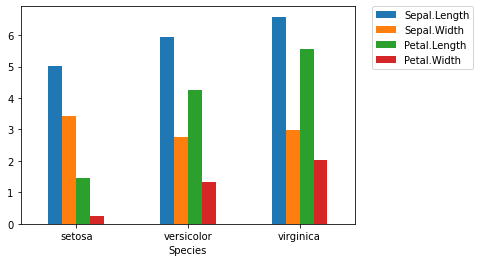

In [13]:
import matplotlib.pyplot as plt
g = iris_df.groupby(iris_df['Species']).mean()
g.plot(kind='bar', rot=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
#다중 열로 그룹화

In [15]:
iris_df.groupby([iris_df['Species'],iris_df['Sepal.Length']]).describe()

Sepal.Width                                        \
                              count      mean       std  min    25%   50%   
Species    Sepal.Length                                                     
setosa     4.3                  1.0  3.000000       NaN  3.0  3.000  3.00   
           4.4                  3.0  3.033333  0.152753  2.9  2.950  3.00   
           4.5                  1.0  2.300000       NaN  2.3  2.300  2.30   
           4.6                  4.0  3.325000  0.221736  3.1  3.175  3.30   
           4.7                  2.0  3.200000  0.000000  3.2  3.200  3.20   
           4.8                  5.0  3.180000  0.204939  3.0  3.000  3.10   
           4.9                  3.0  3.266667  0.288675  3.1  3.100  3.10   
           5.0                  7.0  3.385714  0.195180  3.0  3.350  3.40   
           5.1                  8.0  3.600000  0.200000  3.3  3.475  3.60   
           5.2                  3.0  3.666667  0.378594  3.4  3.450  3.50   
           5.3                  1.0  3.700000       NaN  3.7  3.700  3.70   
           5.4                  5.0  3.660000  0.250998  3.4  3.400  3.70   
           5.5                  2.0  3.850000  0.494975  3.5  3.675  3.85   
           5.7                  2.0  4.100000  0.424264  3.8  3.950  4.10   
           5.8                  1.0  4.000000       NaN  4.0  4.000  4.00   
versicolor 4.9                  1.0  2.400000       NaN  2.4  2.400  2.40   
           5.0                  2.0  2.150000  0.212132  2.0  2.075  2.15   
           5.1                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.4                  1.0  3.000000       NaN  3.0  3.000  3.00   
           5.5                  4.0  2.400000  0.081650  2.3  2.375  2.40   
           5.6                  5.0  2.820000  0.216795  2.5  2.700  2.90   
           5.7                  5.0  2.820000  0.148324  2.6  2.800  2.80   
           5.8                  3.0  2.666667  0.057735  2.6  2.650  2.70   
           5.9                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.0                  4.0  2.800000  0.496655  2.2  2.575  2.80   
           6.1                  4.0  2.875000  0.095743  2.8  2.800  2.85   
           6.2                  2.0  2.550000  0.494975  2.2  2.375  2.55   
           6.3                  3.0  2.700000  0.529150  2.3  2.400  2.50   
           6.4                  2.0  3.050000  0.212132  2.9  2.975  3.05   
           6.5                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.6                  2.0  2.950000  0.070711  2.9  2.925  2.95   
           6.7                  2.0  3.050000  0.070711  3.0  3.025  3.05   
           6.8                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.9                  1.0  3.100000       NaN  3.1  3.100  3.10   
           7.0                  1.0  3.200000       NaN  3.2  3.200  3.20   
virginica  4.9                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.6                  1.0  2.800000       NaN  2.8  2.800  2.80   
           5.7                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.8                  3.0  2.733333  0.057735  2.7  2.700  2.70   
           5.9                  1.0  3.000000       NaN  3.0  3.000  3.00   
           6.0                  2.0  2.600000  0.565685  2.2  2.400  2.60   
           6.1                  2.0  2.800000  0.282843  2.6  2.700  2.80   
           6.2                  2.0  3.100000  0.424264  2.8  2.950  3.10   
           6.3                  6.0  2.933333  0.350238  2.5  2.725  2.85   
           6.4                  5.0  2.920000  0.216795  2.7  2.800  2.80   
           6.5                  4.0  3.050000  0.100000  3.0  3.000  3.00   
           6.7                  5.0  3.040000  0.328634  2.5  3.000  3.10   
           6.8                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.9                  3.0  3.133333  0.057735  3.1  3.100  3.10   
           7.1      

In [16]:
iris_df.groupby(iris_df['Species']).describe().transpose()

Species                setosa  versicolor  virginica
Sepal.Length count  48.000000   47.000000  50.000000
             mean    5.008333    5.944681   6.588000
             std     0.359570    0.505108   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [17]:
g = iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.974074     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.850000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.520000     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [18]:
g.unstack().T #끝에 있는 인덱스 Petal.Width가 컬럼

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.974074         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

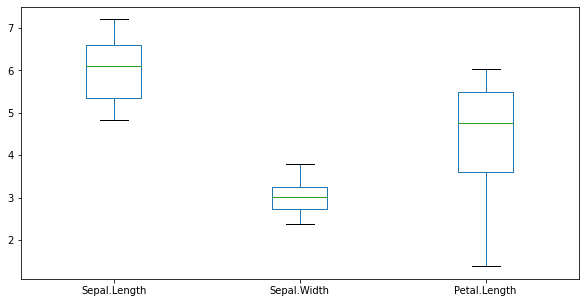

In [19]:
g.plot.box(figsize=(10,5))

In [20]:
import pandas as pd
pd.options.display.max_columns = 22

In [21]:
iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']])['Sepal.Length'].mean().unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.974074,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.85,5.884615,6.52,6.19,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.10,6.15,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


### 그룹간 반복 처리

In [22]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group

In [23]:
for idx, grouped in enumerate(iris_group):
    print(idx,'번째 그룹')
    print(grouped)
    print('----------------------------------------------------------------')

0 번째 그룹
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            NaN          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14    

In [24]:
for idx, (spe_name,group) in enumerate(iris_group):
    print(idx,'번째 그룹',spe_name)
    print(group)
    print('----------------------------------------------------------------')

0 번째 그룹 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            NaN          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14        

In [25]:
for idx, (spe_name,group) in enumerate(iris_group):
    print(idx,'번째 그룹',spe_name)
    print(group.head(3))
    print('----------------------------------------------------------------')

0 번째 그룹 setosa
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           NaN          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
----------------------------------------------------------------
1 번째 그룹 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
----------------------------------------------------------------
2 번째 그룹 virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica
----------

In [28]:
t = iris_df.groupby(iris_df.Species).take([0,1,2])
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,NaN,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### 원핫인코딩 / 레이블

In [31]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
iris_df.Species.describe()

count            150
unique             3
top       versicolor
freq              50
Name: Species, dtype: object

In [36]:
from sklearn .preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df.Species) #라벨링
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## 데이터 구조 변경

### 와이드 포맷 vs 롱 포맷

In [38]:
######################################################################################################
import statsmodels.api as sm
airquality_data = sm.datasets.get_rdataset("airquality",package="datasets").data
airquality_data

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


### melt를 이용한 언피벗팅(와이드 > 롱)

In [43]:
airquality_melt = airquality_data.melt(id_vars=['Month', 'Day'], var_name='VAR', value_name='VAL') #컬럼으로 남는 변수
airquality_melt

,Month,Day,VAR,VAL
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [59]:
airquality_melt_sort = airquality_melt.sort_values(by=['Month', 'Day'])
airquality_melt_sort#롱 포맷

,Month,Day,VAR,VAL
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


In [48]:
pd.melt(airquality_data,id_vars=['Month', 'Day'], var_name='VAR', value_name='VAL')

,Month,Day,VAR,VAL
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


### pivot_table을 이용한 피벗팅 (롱 > 와이드)

In [53]:
airquality2 = airquality_melt.pivot_table(index=['Month','Day'], columns=['VAR'],values=['VAL'])
airquality2

VAL                    
VAR       Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [54]:
airquality2.loc[5]

VAL                    
VAR  Ozone Solar.R  Temp  Wind
Day                           
1     41.0   190.0  67.0   7.4
2     36.0   118.0  72.0   8.0
3     12.0   149.0  74.0  12.6
4     18.0   313.0  62.0  11.5
5      NaN     NaN  56.0  14.3
6     28.0     NaN  66.0  14.9
7     23.0   299.0  65.0   8.6
8     19.0    99.0  59.0  13.8
9      8.0    19.0  61.0  20.1
10     NaN   194.0  69.0   8.6
11     7.0     NaN  74.0   6.9
12    16.0   256.0  69.0   9.7
13    11.0   290.0  66.0   9.2
14    14.0   274.0  68.0  10.9
15    18.0    65.0  58.0  13.2
16    14.0   334.0  64.0  11.5
17    34.0   307.0  66.0  12.0
18     6.0    78.0  57.0  18.4
19    30.0   322.0  68.0  11.5
20    11.0    44.0  62.0   9.7
21     1.0     8.0  59.0   9.7
22    11.0   320.0  73.0  16.6
23     4.0    25.0  61.0   9.7
24    32.0    92.0  61.0  12.0
25     NaN    66.0  57.0  16.6
26     NaN   266.0  58.0  14.9
27     NaN     NaN  57.0   8.0
28    23.0    13.0  67.0  12.0
29    45.0   252.0  81.0  14.9
30   115.0   223.0  79.0   5.7
31    37.0   279.0  76.0   7.4

In [56]:
airquality2 = airquality2.reset_index(level=['Month', 'Day'], col_level=1)
airquality2

VAL                    
VAR Month Day Ozone Solar.R  Temp  Wind
0       5   1  41.0   190.0  67.0   7.4
1       5   2  36.0   118.0  72.0   8.0
2       5   3  12.0   149.0  74.0  12.6
3       5   4  18.0   313.0  62.0  11.5
4       5   5   NaN     NaN  56.0  14.3
..    ...  ..   ...     ...   ...   ...
148     9  26  30.0   193.0  70.0   6.9
149     9  27   NaN   145.0  77.0  13.2
150     9  28  14.0   191.0  75.0  14.3
151     9  29  18.0   131.0  76.0   8.0
152     9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [57]:
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2

VAR,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [62]:
airquality3 = airquality_melt_sort.pivot_table(index=['Month','Day'], columns=['VAR'],values=['VAL'])
airquality3
airquality3 = airquality3.reset_index(level=['Month', 'Day'], col_level=1)
airquality3
airquality3.columns = airquality3.columns.droplevel(level=0)
airquality3

VAR,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [63]:
#전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv > df_first
#주택도시보증공사_전국 평균 분양가격(2019년 12월).csv > df_last
# concat
# 시간별 평당분양가격 추이, 지역별 평당분양가격 추이

In [153]:
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='CP949')
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='CP949')
df_first_melt = df_first.melt(id_vars='지역', var_name='날짜', value_name='분양가격')
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'],errors='coerce')
df_last['분양가격(㎡)'] = df_last['분양가격(㎡)']*3.3
df_last['날짜'] = df_last['연도'].astype('str') +"년"+ df_last['월'].astype('str')+"월"
df_last.columns = ['지역', '규모구분', '연도', '월', '분양가격', '날짜']
df_last
new_last = df_last.loc[:,['지역', '날짜', '분양가격']]
cc = pd.concat([df_first_melt, new_last], axis=0)
cc

,지역,날짜,분양가격
0,서울,2013년12월,18189.0
1,부산,2013년12월,8111.0
2,대구,2013년12월,8080.0
3,인천,2013년12월,10204.0
4,광주,2013년12월,6098.0
...,...,...,...
4330,제주,2019년12월,12810.6
4331,제주,2019년12월,NaN
4332,제주,2019년12월,12863.4
4333,제주,2019년12월,NaN


In [136]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),날짜
0,서울,전체,2015,10,19275.3,2015년10월
1,서울,전용면적 60㎡이하,2015,10,18651.6,2015년10월
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,19410.6,2015년10월
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,18879.3,2015년10월
4,서울,전용면적 102㎡초과,2015,10,19400.7,2015년10월
...,...,...,...,...,...,...
4330,제주,전체,2019,12,12810.6,2019년12월
4331,제주,전용면적 60㎡이하,2019,12,NaN,2019년12월
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,12863.4,2019년12월
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,2019년12월


In [ ]:
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',encoding='cp949')
df_last["연도"] = df_last["연도"].astype('str')
df_last["월"] = df_last["월"].astype('str')
df_last["분양가격(㎡)"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")
df_last["평당분양가격"] = df_last["분양가격(㎡)"] * 3.3
df_last["연도월"] = df_last["연도"] + "년" +  df_last["월"] +"월"
new_last = df_last.loc[df_last["규모구분"]=='전체', ['지역명', '연도월','평당분양가격']]

In [ ]:
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')
new_first = df_first.melt(id_vars="지역", var_name="연도월", value_name="평당분양가격")
new_first.columns = ['지역명', '연도월', '평당분양가격']
result = pd.concat([new_first, new_last])

In [144]:
#데이터 프레임의 구조를 바꾸는 함수: melt, pivot_table(연산), pivot

In [146]:
year = [2020,2020,2020,2021,2021,2021,]
mon = [1,2,3]*2
latte = [410,401,402,400,404,405]
americano = [500,483,484,480,486,488]
mocha = [350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha], columns=['year','mon','latte','americano','mocha'])
sales_melted = sales.melt(id_vars=['year','mon'])
sales_melted

,year,mon,variable,value
0,2020,1,latte,410
1,2020,2,latte,401
2,2020,3,latte,402
3,2021,1,latte,400
4,2021,2,latte,404
5,2021,3,latte,405
6,2020,1,americano,500
7,2020,2,americano,483
8,2020,3,americano,484
9,2021,1,americano,480


In [147]:
sale2 = sales_melted.pivot_table(index=['year','mon'], columns=['variable'],values=['value'])
sale2

value            
variable americano latte mocha
year mon                      
2020 1         500   410   350
     2         483   401   299
     3         484   402   300
2021 1         480   400   301
     2         486   404   302
     3         488   405   300

In [149]:
latte_sales = sales.loc[:,'year':'latte']
latte_sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [154]:
latte_sales.pivot('year', 'mon')

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

## 데이터 프레임에 함수 적용시키기
- 데이터 프레임이나 시리즈에 각 열 또는 각 행에 함수 적용

### apply
- 행 또는 열별 적용 > series or dataframe

In [155]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris_df = datasets.get_rdataset("iris", package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [156]:
#독립변수
iris_df.iloc[:,:-1]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [158]:
X = iris_df.loc[:,'Sepal.Length':'Petal.Width']

In [159]:
X.apply(np.around) #전체 적용

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [160]:
X.apply(np.sum, axis=0) #열별 합

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [161]:
X.apply(np.sum, axis=1) #행별 합

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [166]:
#평균과의 거리
avg = X.apply(np.average)
X.apply(lambda x: list(x-avg), axis=1, result_type='broadcast') #원본 데이터 그대로

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [173]:
cc['연도'] = cc['날짜'].apply(lambda x:int(x.split('년')[0]))
cc['월'] = cc['날짜'].apply(lambda x:int(x.split('년')[-1].replace('월','')))
cc

,지역,날짜,분양가격,연도,월
0,서울,2013년12월,18189.0,2013,12
1,부산,2013년12월,8111.0,2013,12
2,대구,2013년12월,8080.0,2013,12
3,인천,2013년12월,10204.0,2013,12
4,광주,2013년12월,6098.0,2013,12
...,...,...,...,...,...
4330,제주,2019년12월,12810.6,2019,12
4331,제주,2019년12월,NaN,2019,12
4332,제주,2019년12월,12863.4,2019,12
4333,제주,2019년12월,NaN,2019,12


### applymap
- 각 요소 하나씩 적용 > dataframe

In [11]:
X.applymap(np.sum) # 요소요소별로 작동

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
X.applymap(lambda x : x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


### map
- series 타입의 벡터

In [174]:
cc['연도'] = cc['날짜'].map(lambda x: int(x.split('년')[0]))
cc

,지역,날짜,분양가격,연도,월
0,서울,2013년12월,18189.0,2013,12
1,부산,2013년12월,8111.0,2013,12
2,대구,2013년12월,8080.0,2013,12
3,인천,2013년12월,10204.0,2013,12
4,광주,2013년12월,6098.0,2013,12
...,...,...,...,...,...
4330,제주,2019년12월,12810.6,2019,12
4331,제주,2019년12월,NaN,2019,12
4332,제주,2019년12월,12863.4,2019,12
4333,제주,2019년12월,NaN,2019,12


In [175]:
x = pd.Series(["홍길동",20,"서울 마포"], index=["Name","Age","Address"])

In [176]:
def my_func(data):
    return data, len(str(data))
my_func("서울 마포")

('서울 마포', 5)

In [177]:
x.map(my_func)

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [178]:
x.map(lambda data : ( data, len( str(data)) )  )

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [179]:
# 딕셔너리를 map에 적용하면 딕셔너리의 키별로 시리즈 값이 적용
dic = {"홍길동":"김길동", 20:25, "마포":"서대문"}
x.map(dic)

Name       김길동
Age         25
Address    NaN
dtype: object

## 일괄 변경하기 (결측값이나 특정값)

In [183]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                 [3 ,4 ,np.nan ,3],
                 [np.nan, 3, np.nan, 5],
                 [np.nan, 3, np.nan, 5]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,3
2,NaN,3,NaN,5
3,NaN,3,NaN,5


In [185]:
# 모든 결측치를 0으로 채움
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,3
2,0.0,3,0.0,5
3,0.0,3,0.0,5


In [187]:
#결측치가 아닌 이전값 또는 다음값으로 대치
df.fillna(method="ffill")#이전값

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,3
2,3.0,3,NaN,5
3,3.0,3,NaN,5


In [189]:
df.fillna(method="bfill")#다음값

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,3
2,NaN,3,NaN,5
3,NaN,3,NaN,5


In [190]:
df.fillna(value=df.median())

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,3
2,3.0,3,NaN,5
3,3.0,3,NaN,5


In [191]:
df.fillna(value=999, limit=3) #3번째까지만

,A,B,C,D
0,999.0,2,999.0,0
1,3.0,4,999.0,3
2,999.0,3,999.0,5
3,999.0,3,NaN,5


### replace(to_value,new_value,inplace=False)
- 값 변경
- False: 내용만 반환, True: 데이터 프레임 적용후 반환되지 않음

In [198]:
s = pd.Series([0,1,2,2,3,4,None])
s.replace(1,8,inplace=False)

0    0.0
1    8.0
2    2.0
3    2.0
4    3.0
5    4.0
6    NaN
dtype: float64

In [199]:
df = pd.DataFrame({'A':[0,1,2,3,4],
                   'B':[5,6,7,8,9],
                   'C':['a','b','c','d','e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [200]:
df.replace([0,1,2,3],99)

,A,B,C
0,99,5,a
1,99,6,b
2,99,7,c
3,99,8,d
4,4,9,e


In [201]:
df.replace([0,1,2,3],[99,98,97,96]) # 0은99로, 1은98로 대체

,A,B,C
0,99,5,a
1,98,6,b
2,97,7,c
3,96,8,d
4,4,9,e


In [202]:
df.replace(range(4),range(4,0,-1)) # [0,1,2,3] 를 [4,3,2,1]로 대체

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


In [203]:
df.replace({'A':0, 'B':5}, 99) # A열의 0과 B열의 5를 99로 대체

,A,B,C
0,99,99,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [204]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                   'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [205]:
# to_value에 정규표현식이 사용된 경우 
# ba로 시작하고 마지막 임의의 문자가 있는 문자열을 )
df.replace(r'^ba.$', 'newBar', regex=True)

,A,B
0,newBar,abc
1,foo,newBar
2,bait,xyz


In [206]:
df.replace({'A':r'^ba.$'},{'A':'newBar'}, regex=True)

,A,B
0,newBar,abc
1,foo,bar
2,bait,xyz


### where, mask
- where: 조건이 만족하는 요소는 그대로 출력
- mask: 조건을 만족하지 않는 요소 출력

In [13]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [14]:
s.where(s>0) # 조건이 만족하는 값만 보이고 만족하지 않으면 결측치로 대체

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [15]:
s.where(s>0, 99)# 조건이 만족하는 값만 보이고 만족하지 않으면 99로 대체

0    99
1     1
2     2
3     3
4     4
dtype: int64

In [16]:
s.mask(s>0)

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [17]:
s.mask(s>0, -s)

0    0
1   -1
2   -2
3   -3
4   -4
dtype: int64

### dropna
- 결측치 있는 데이터 누락

In [208]:
df = pd.DataFrame({'A':[0,1,2,3,4],
                   'B':[5,6,7,np.nan,9],
                   'C':[np.nan,'b','c','d','e']})
df

,A,B,C
0,0,5.0,NaN
1,1,6.0,b
2,2,7.0,c
3,3,NaN,d
4,4,9.0,e


In [210]:
df.dropna() #결측치가 있는 행 제거

,A,B,C
1,1,6.0,b
2,2,7.0,c
4,4,9.0,e


In [212]:
df.dropna(how='all',inplace=True)#행의 모든 열의 데이터가 다 결측치인 행만 제거

In [214]:
df.dropna(axis=1)#결측치가 있는 열 제거

,A
0,0
1,1
2,2
3,3
4,4


In [216]:
df_first_melt['평당가격'] = df_first_melt['분양가격'].astype('float64', copy=True)
# 기존값 변경에도 영향을 받지 않음

## 시리즈

In [228]:
s = pd.Series([1000,2000,2500],
             index=['a','b','c'])
s

a    1000
b    2000
c    2500
dtype: int64

In [229]:
s['a']

1000

In [230]:
s['a':'c']

a    1000
b    2000
c    2500
dtype: int64

In [231]:
s[['a']]

a    1000
dtype: int64

In [232]:
s.drop('c', inplace=True)
s

a    1000
b    2000
dtype: int64

In [233]:
s.sort_values()

a    1000
b    2000
dtype: int64

In [234]:
s.to_frame()

,0
a,1000
b,2000


In [235]:
s.to_frame().T

,a,b
0,1000,2000


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets

In [39]:
iris_df = datasets.get_rdataset("iris", package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
import random
X = iris_df.loc[:,'Sepal.Length':'Petal.Width']
for idx in X.columns:
    rownum = random.sample(range(len(iris_df)),20)
    for row in rownum:
        iris_df.loc[row, idx] = np.nan

In [34]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,43,41,41,42
versicolor,42,43,43,42
virginica,45,46,46,46


In [38]:
iris_df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [35]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,NaN,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,NaN,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [48]:
iris_df.fillna(value=round(iris_df.mean()), inplace=True)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [102]:
#1. iris 데이터에서 처음 다 섯 개 행만 출력하세요
iris_df.iloc[:5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
#2. iris 데이터를 독립 변수 X 와 종속변수 y 로 나누세요 . 종속변수는 species 열입니다
X=iris_df.iloc[:,:-1]
Y=iris_df.iloc[:,-1]

pandas.core.series.Series

In [56]:
#3. iris 데이터에서 처음 50 개행을 빼 내서 temp 변수에 저장하세요
temp = iris_df.iloc[0:50,]

In [57]:
#4. 3 번 에서 선택한 데이터프에임의 요약정보를 출력하세요 . 모든 열에 대해 요약정보가 출력되어야 합니다
temp.describe()#숫자만

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [62]:
#5. versicolor 종의 데이터만 iris_versicolor 변수에 저장하세요
iris_versicolor = iris_df.loc[iris_df.Species=='versicolor']

In [65]:
#6. 2 번 의 X 와 y 변수를 합해서 iris_df 데이터 프레임으로 만드세요
iris_df = pd.concat([X,Y], axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [67]:
#7. iris 데이터의 각 열 평균값을 출력하세요
iris_df.mean()

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [68]:
#8. iris 데이터의 각 열들 사이의 상관계수를 출력하세요
iris_df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [70]:
#9. iris 데이터에서 각 요소들과 변수별 평균과의 차이를 출력하세요.
avg = X.apply(np.average)
X.apply(lambda x: list(x-avg), axis=1, result_type='broadcast')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [77]:
#10. iris 데이터의 종별 평균을 구하세요
iris_df.groupby(iris_df.Species).mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [103]:
#11. iris 데이터에서 각 요소들과 종별 변수의 편균과의 차이를 출력하세요
X = iris_df.groupby(iris_df.Species).mean()
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [109]:
a = X.loc['setosa',:]
b = iris_df.loc[0]
print(a)
print(b[:-1])
print('~~~~~~~')
print(a-b[:-1])
print('~~~~~~~')
print(a-b)

Sepal.Length    5.006
Sepal.Width     3.428
Petal.Length    1.462
Petal.Width     0.246
Name: setosa, dtype: float64
Sepal.Length    5.1
Sepal.Width     3.5
Petal.Length    1.4
Petal.Width     0.2
Name: 0, dtype: object
~~~~~~~
Sepal.Length   -0.094
Sepal.Width    -0.072
Petal.Length    0.062
Petal.Width     0.046
dtype: object
~~~~~~~
Petal.Length    0.062
Petal.Width     0.046
Sepal.Length   -0.094
Sepal.Width    -0.072
Species           NaN
dtype: object


In [106]:
result = iris_df.apply(lambda x : x-X.loc[x.Species,:], axis=1)
result

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
3,0.038,-0.046,-0.406,-0.328,NaN
4,-0.062,-0.046,-0.006,0.172,NaN
...,...,...,...,...,...
145,-0.352,0.274,0.112,0.026,NaN
146,-0.552,-0.126,-0.288,-0.474,NaN
147,-0.352,-0.026,-0.088,0.026,NaN
148,-0.152,0.274,-0.388,0.426,NaN


In [108]:
result.loc[[0,1,2,50,51,52,100,101,102]]
t = result.groupby(iris_df.Species).take(range(3))
t

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width  Species
Species                                                                      
setosa     0          -0.062       -0.046         0.094        0.072      NaN
           1          -0.062       -0.046        -0.106       -0.428      NaN
           2          -0.162       -0.046        -0.306       -0.228      NaN
versicolor 50          0.440        0.074         1.064        0.430      NaN
           51          0.240        0.174         0.464        0.430      NaN
           52          0.640        0.174         0.964        0.330      NaN
virginica  100         0.448        0.474        -0.288        0.326      NaN
           101        -0.452       -0.126        -0.788       -0.274      NaN
           102         0.348        0.074         0.512        0.026      NaN